In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Global_Mobility_Report.csv",low_memory=False).replace(np.nan, '', regex=True)
data

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,,,,,2020-02-15,0,4,5,0,2,1
1,AE,United Arab Emirates,,,,,2020-02-16,1,4,4,1,2,1
2,AE,United Arab Emirates,,,,,2020-02-17,-1,1,5,1,2,1
3,AE,United Arab Emirates,,,,,2020-02-18,-2,1,5,0,2,1
4,AE,United Arab Emirates,,,,,2020-02-19,-2,0,4,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606462,ZW,Zimbabwe,Midlands Province,,ZW-MI,,2020-06-23,,,,,-3,
606463,ZW,Zimbabwe,Midlands Province,,ZW-MI,,2020-06-24,,,,,-6,
606464,ZW,Zimbabwe,Midlands Province,,ZW-MI,,2020-06-25,,,,,-3,
606465,ZW,Zimbabwe,Midlands Province,,ZW-MI,,2020-06-26,,,,,-3,


In [14]:
def cleanData(pd):
    return pd[[
    "date",
        "country_region",
        "sub_region_1",
        "sub_region_2",
    "retail_and_recreation_percent_change_from_baseline",
    "grocery_and_pharmacy_percent_change_from_baseline",
    "parks_percent_change_from_baseline",
    "transit_stations_percent_change_from_baseline",
    "workplaces_percent_change_from_baseline",
"residential_percent_change_from_baseline"]].rename(columns = {
        "country_region":"country",
        "sub_region_1":"state",
        "sub_region_2":"county",
    "retail_and_recreation_percent_change_from_baseline":"retail",
"grocery_and_pharmacy_percent_change_from_baseline":"grocery_pharmacy",
    "parks_percent_change_from_baseline":"parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplace",
"residential_percent_change_from_baseline":"residential"}).set_index(["date"])
    

In [15]:
def getDataFor(country_code, state="",county=""):
    return cleanData(data.replace(np.nan, "", regex=True) [(data["country_region"]==country_code) &  (data["sub_region_1"]==state) &  (data["sub_region_2"]==county)])

In [16]:
arizona=getDataFor("United States","Arizona")
arizona

,country,state,county,retail,grocery_pharmacy,parks,transit,workplace,residential
date,,,,,,,,,
2020-02-15,United States,Arizona,,3,2,13,3,-1,0
2020-02-16,United States,Arizona,,7,3,30,3,0,-1
2020-02-17,United States,Arizona,,9,1,35,1,-25,5
2020-02-18,United States,Arizona,,2,2,14,6,2,0
2020-02-19,United States,Arizona,,4,2,14,7,1,0
2020-02-20,United States,Arizona,,5,2,21,5,-1,0
2020-02-21,United States,Arizona,,2,1,10,4,0,0
2020-02-22,United States,Arizona,,-2,-4,-42,-6,-4,3
2020-02-23,United States,Arizona,,6,1,6,7,1,0


In [17]:
#santa_cruz_data=data[(data["country_region_code"]=="US") &  (data["sub_region_1"]=="California") &  (data["sub_region_2"]=="Santa Cruz County")]
california = getDataFor("United States","California")
california

,country,state,county,retail,grocery_pharmacy,parks,transit,workplace,residential
date,,,,,,,,,
2020-02-15,United States,California,,1,1,19,1,-1,0
2020-02-16,United States,California,,5,0,31,1,-1,-1
2020-02-17,United States,California,,9,1,44,-12,-38,8
2020-02-18,United States,California,,0,0,16,3,0,0
2020-02-19,United States,California,,0,0,13,1,0,0
2020-02-20,United States,California,,2,1,12,1,0,0
2020-02-21,United States,California,,1,0,8,0,1,0
2020-02-22,United States,California,,0,0,-3,-4,1,1
2020-02-23,United States,California,,4,1,16,3,2,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD39257160>,
      dtype=object)

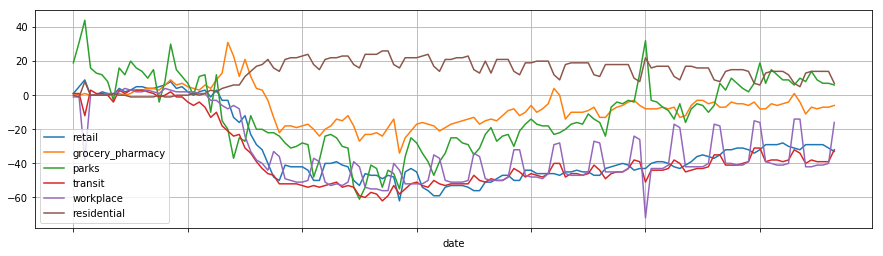

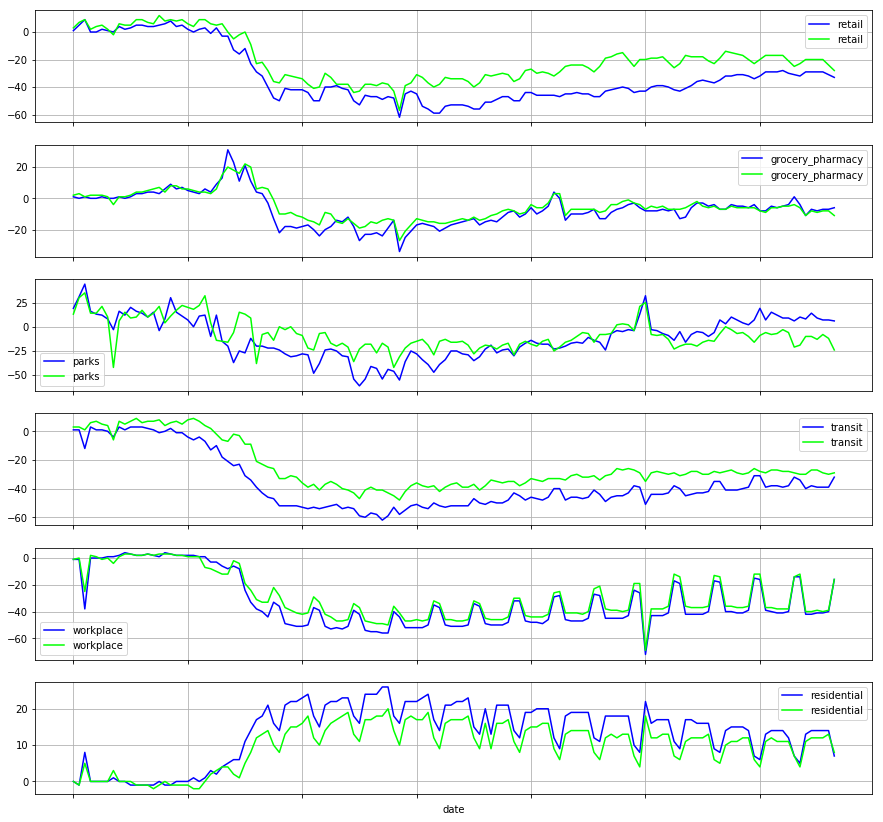

In [18]:
california.plot(figsize=(15,4), grid=True)
ax=california.plot(subplots=True, figsize=(15,16),color=['#0000ff'])
#ax.axhline(0, linestyle='--', color='pink')
arizona.plot(subplots=True, figsize=(15,16), ax=ax,color=['#00ff00'], grid=True)
#df.plot(y=["retail", "F10.7"], figsize=(15,4))


In [48]:
difference_data = pd.DataFrame(columns=california.columns,index=california.index)


In [49]:
difference_data=difference_data.drop(["country","state","county"], axis=1)

for date,sc_row_values in california.iterrows():
    
    other_values = arizona.loc[date]

    difference_data.at[date,"parks"]=sc_row_values["parks"]- other_values["parks"]
    difference_data.at[date,"grocery_pharmacy"]=sc_row_values["grocery_pharmacy"]- other_values["grocery_pharmacy"]
    difference_data.at[date,"retail"]=sc_row_values["retail"]- other_values["retail"]
    difference_data.at[date,"transit"]=sc_row_values["transit"]- other_values["transit"]
    difference_data.at[date,"workplace"]=sc_row_values["workplace"]- other_values["workplace"]
    difference_data.at[date,"residential"]=sc_row_values["residential"]- other_values["residential"]
difference_data

,retail,grocery_pharmacy,parks,transit,workplace,residential
date,,,,,,
2020-02-15,-2,-1,6,-2,0,0
2020-02-16,-2,-3,1,-2,-1,0
2020-02-17,0,0,9,-13,-13,3
2020-02-18,-2,-2,2,-3,-2,0
2020-02-19,-4,-2,-1,-6,-1,0
2020-02-20,-3,-1,-9,-4,1,0
2020-02-21,-1,-1,-2,-4,1,0
2020-02-22,2,4,39,2,5,-2
2020-02-23,-2,0,10,-4,1,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD257216D8>,
      dtype=object)

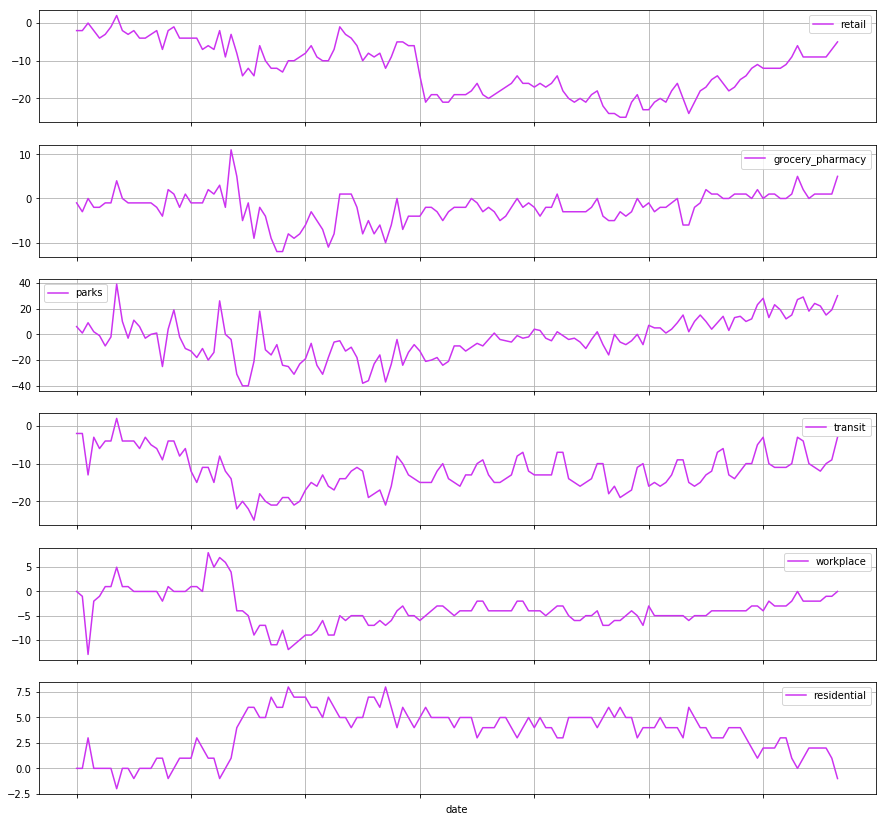

In [50]:
difference_data.plot(subplots=True, figsize=(15,16), color=['#cc33f0'], grid=True)